**Predicting House Prices with Linear Regression**

Description:

The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.shape

(545, 13)

In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

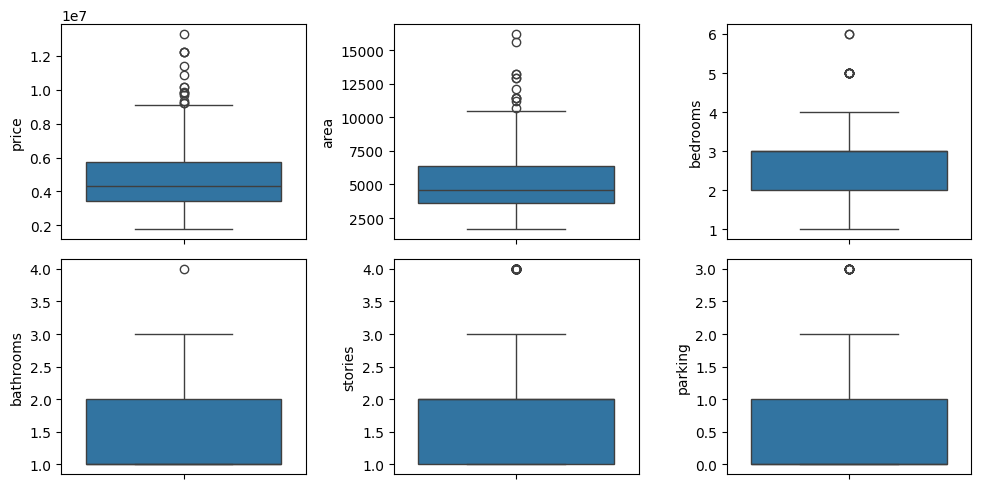

In [9]:
fig,axes = plt.subplots(2,3,figsize=(10,5))

plt1=sns.boxplot(data['price'],ax=axes[0,0])
plt2=sns.boxplot(data['area'],ax=axes[0,1])
plt3=sns.boxplot(data['bedrooms'],ax=axes[0,2])
plt4=sns.boxplot(data['bathrooms'],ax=axes[1,0])
plt5=sns.boxplot(data['stories'],ax=axes[1,1])
plt6=sns.boxplot(data['parking'],ax=axes[1,2])


plt.tight_layout()

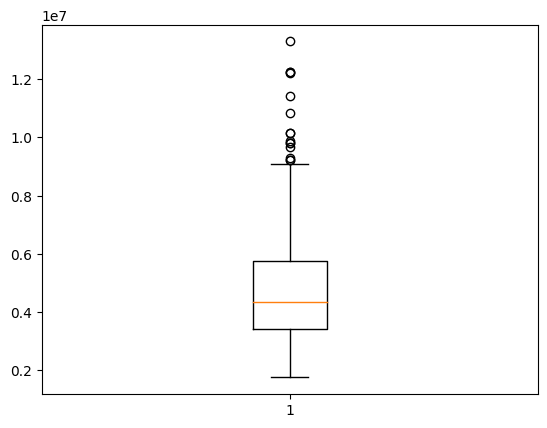

In [10]:
plt.boxplot(data.price)
Q1= data.price.quantile(0.25)
Q3=data.price.quantile(0.75)
IQ=Q3-Q1
data=data[(data.price>=Q1-1.5*IQ) & (data.price<=Q3+1.5*IQ)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7acc25b8db70>,
 'caps': [<matplotlib.lines.Line2D at 0x7acc25b8e0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acc25b8d8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7acc25b8e5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acc25b8e890>],
 'means': []}

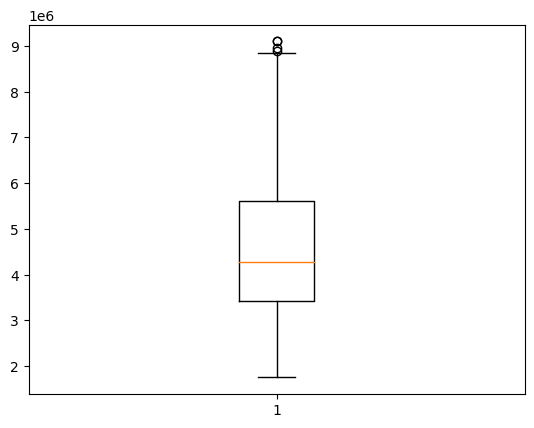

In [11]:
plt.boxplot(data['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7acc25b8f910>,
 'caps': [<matplotlib.lines.Line2D at 0x7acc25b8fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acc25b8f670>],
 'medians': [<matplotlib.lines.Line2D at 0x7acc259bc3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acc259bc670>],
 'means': []}

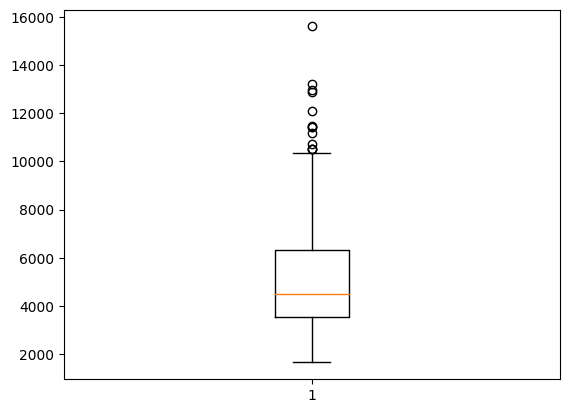

In [12]:
plt.boxplot(data.area)

In [13]:
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3-Q1
data = data[(data.area>=Q1-1.5*IQR)&(data.area<=Q3+1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7acc259fbfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7acc25a2c520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acc259fbd00>],
 'medians': [<matplotlib.lines.Line2D at 0x7acc25b102e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acc25a2c9a0>],
 'means': []}

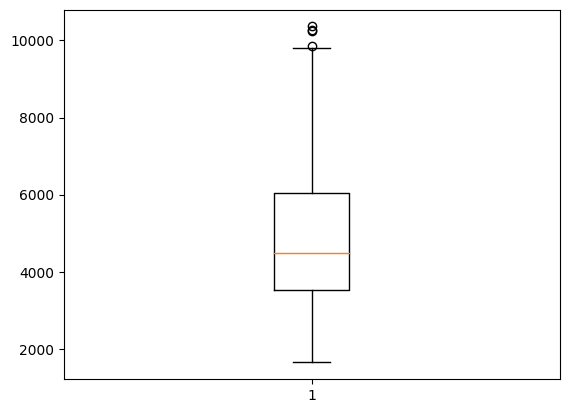

In [14]:
plt.boxplot(data.area)

In [15]:
data.duplicated().sum()

0

<Figure size 1000x500 with 0 Axes>

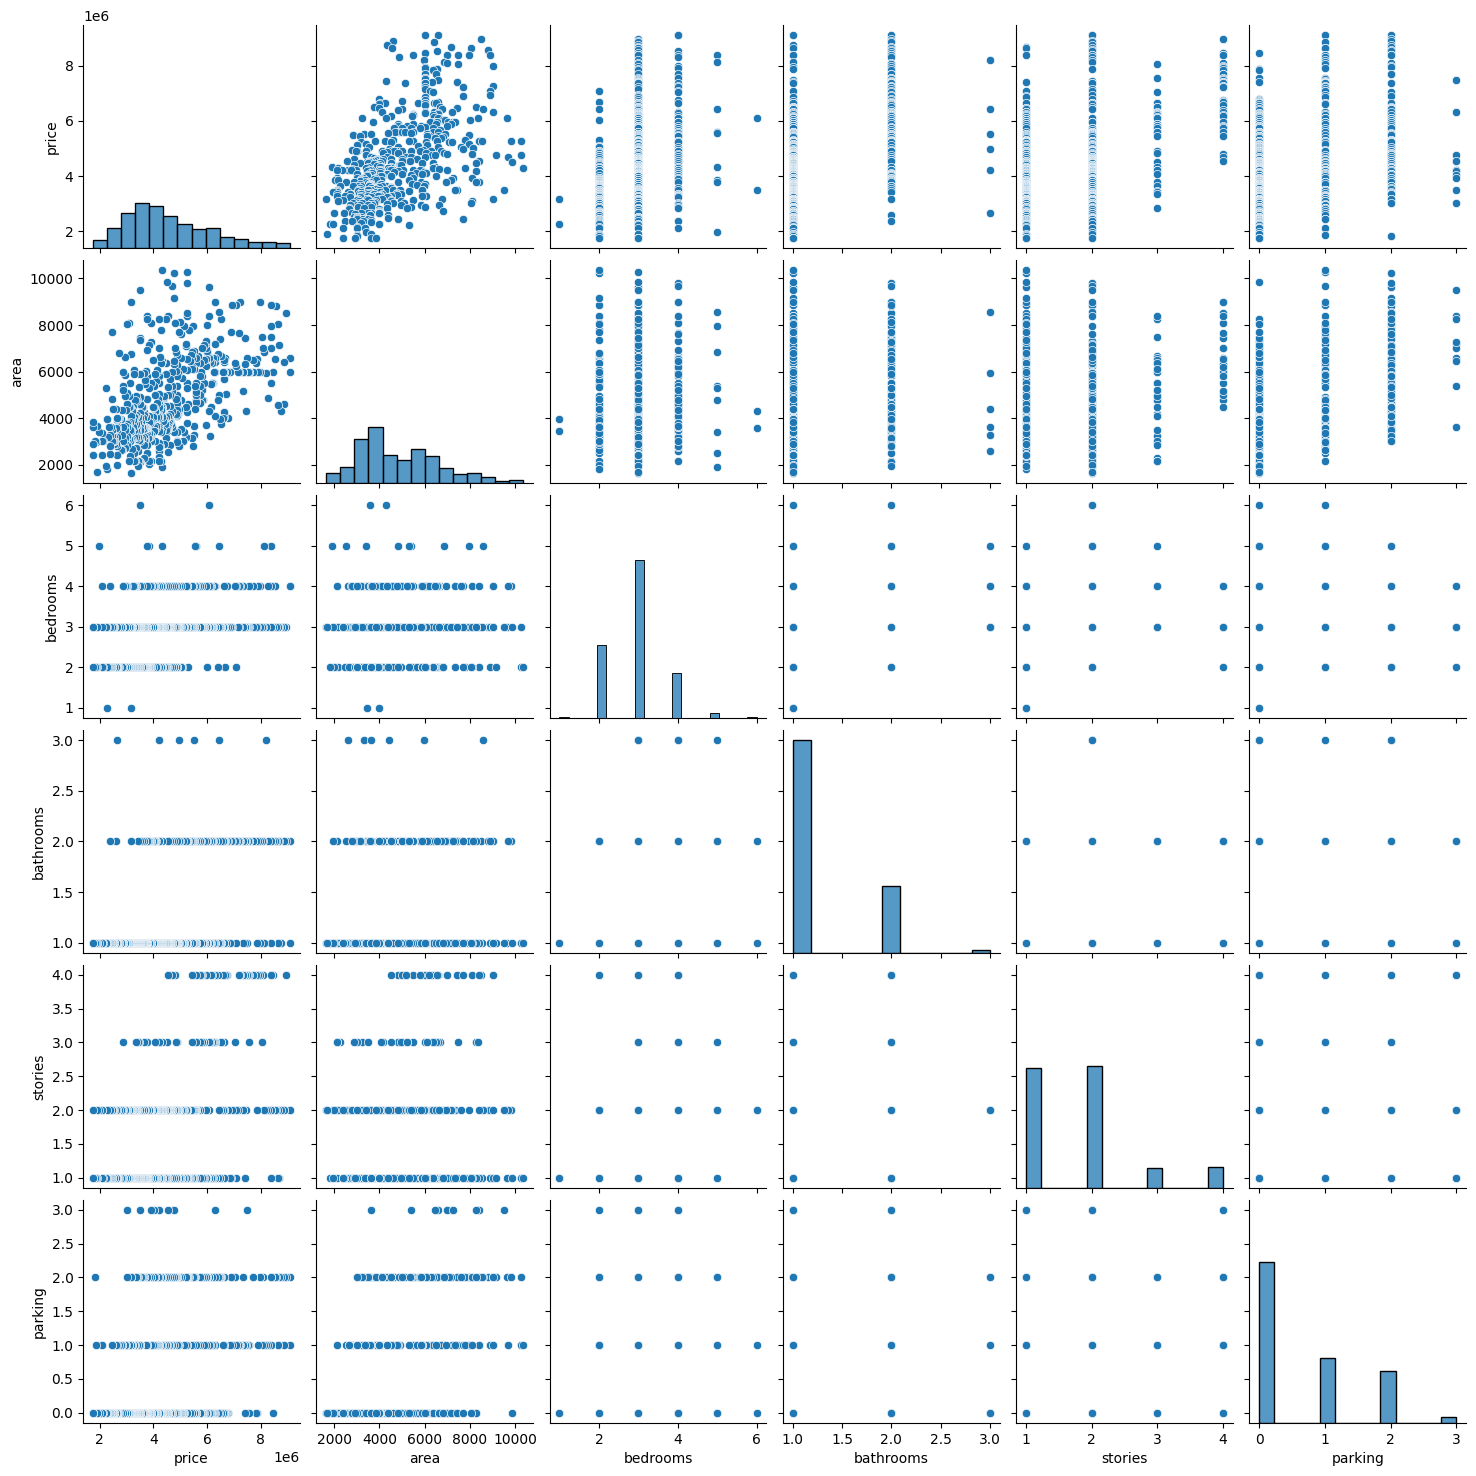

In [16]:
plt.figure(figsize=(10,5))

sns.pairplot(data)

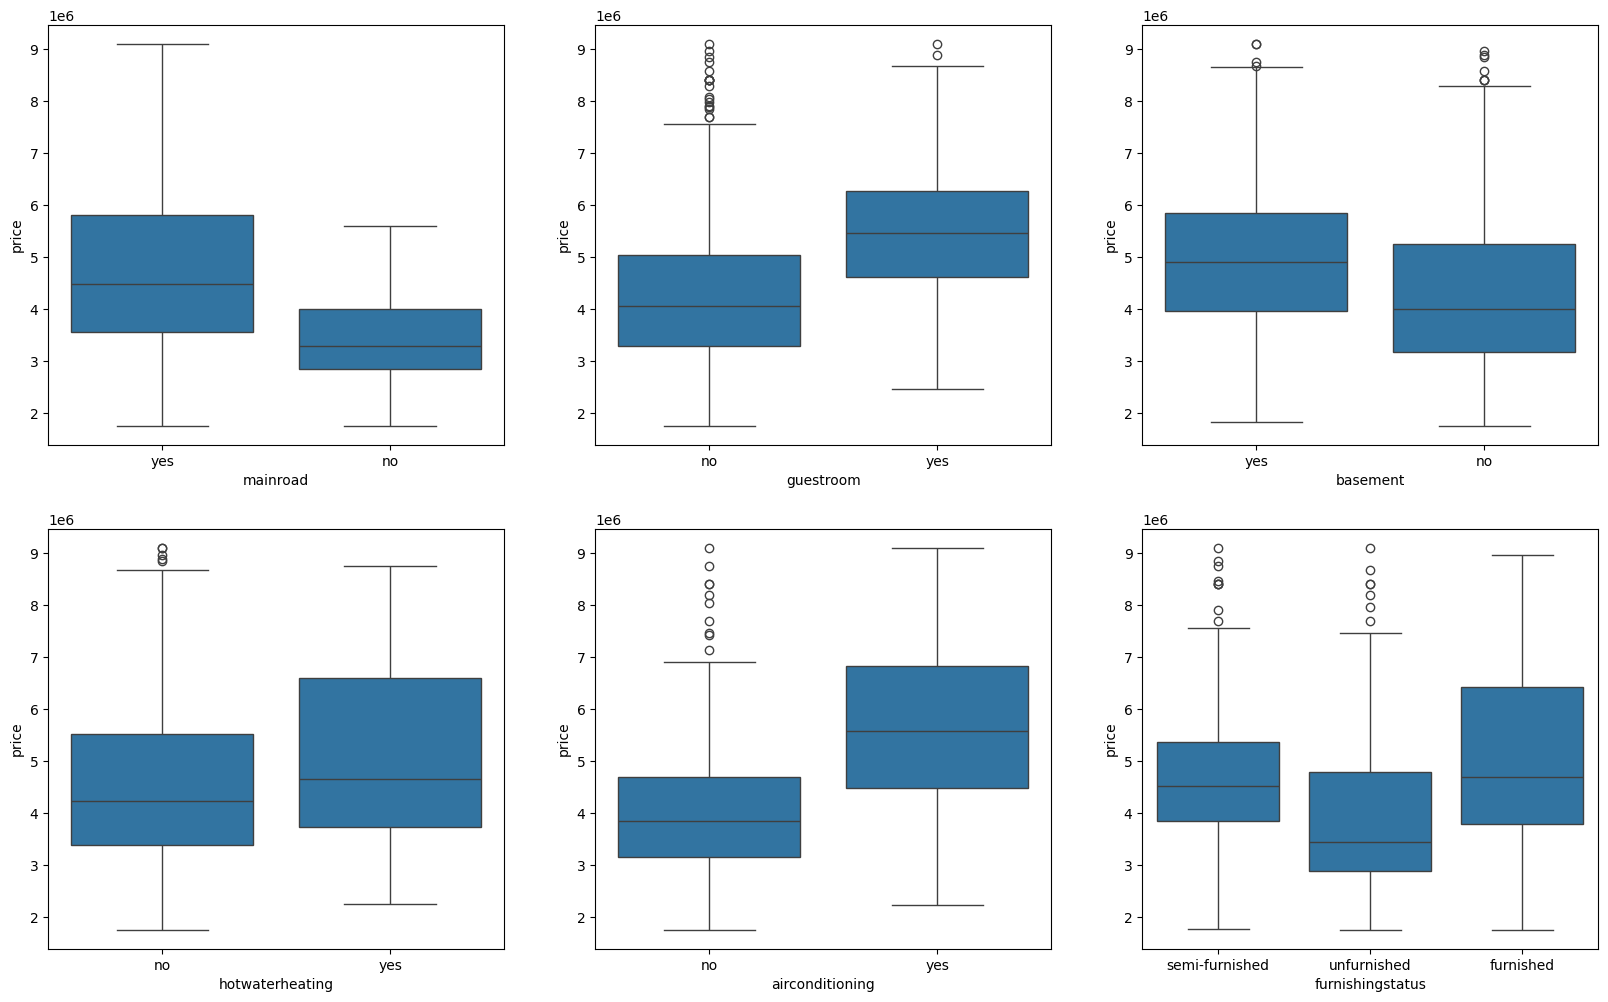

In [21]:
#categorical data

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
plt.show()

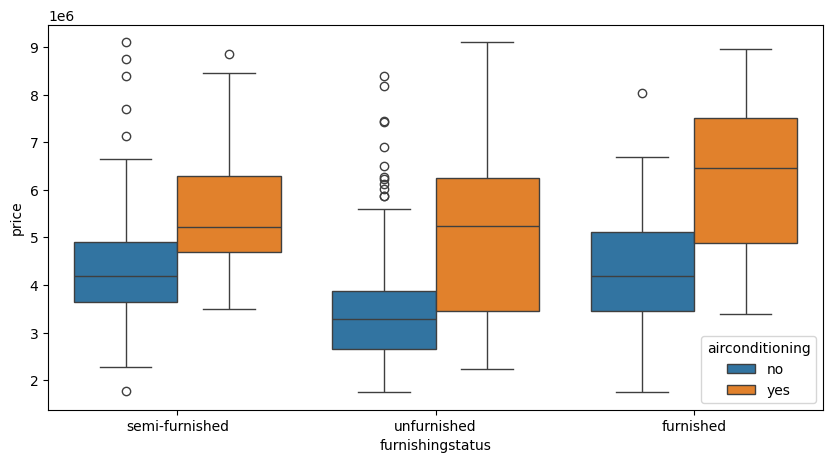

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x="furnishingstatus",y="price",hue="airconditioning",data=data)
plt.show()

In [23]:
categorical=[]
for column in data.columns:
  if data[column].dtype == "object":
    categorical.append(column)

categorical.remove('furnishingstatus')
print(categorical)


['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
oe = OrdinalEncoder().fit(data[categorical])
data[categorical]=oe.transform(data[categorical])

In [26]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1.0,0.0,1.0,0.0,0.0,2,0.0,semi-furnished
16,9100000,6600,4,2,2,1.0,1.0,1.0,0.0,1.0,1,1.0,unfurnished
17,8960000,8500,3,2,4,1.0,0.0,0.0,0.0,1.0,2,0.0,furnished
18,8890000,4600,3,2,2,1.0,1.0,0.0,0.0,1.0,2,0.0,furnished
19,8855000,6420,3,2,2,1.0,0.0,0.0,0.0,1.0,1,1.0,semi-furnished


In [27]:
furnishing_dummies = pd.get_dummies(data['furnishingstatus'], prefix='furnishing')
data = pd.concat([data, furnishing_dummies], axis=1)
data.drop('furnishingstatus', axis=1, inplace=True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
15,9100000,6000,4,1,2,1.0,0.0,1.0,0.0,0.0,2,0.0,False,True,False
16,9100000,6600,4,2,2,1.0,1.0,1.0,0.0,1.0,1,1.0,False,False,True
17,8960000,8500,3,2,4,1.0,0.0,0.0,0.0,1.0,2,0.0,True,False,False
18,8890000,4600,3,2,2,1.0,1.0,0.0,0.0,1.0,2,0.0,True,False,False
19,8855000,6420,3,2,2,1.0,0.0,0.0,0.0,1.0,1,1.0,False,True,False


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

data[num_vars] = scaler.fit_transform(data[num_vars])

In [30]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
15,1.000000,0.499426,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,False,True,False
16,1.000000,0.568312,0.6,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,False,False,True
17,0.980952,0.786452,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,True,False,False
18,0.971429,0.338691,0.4,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.666667,0.0,True,False,False
19,0.966667,0.547646,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,False,True,False


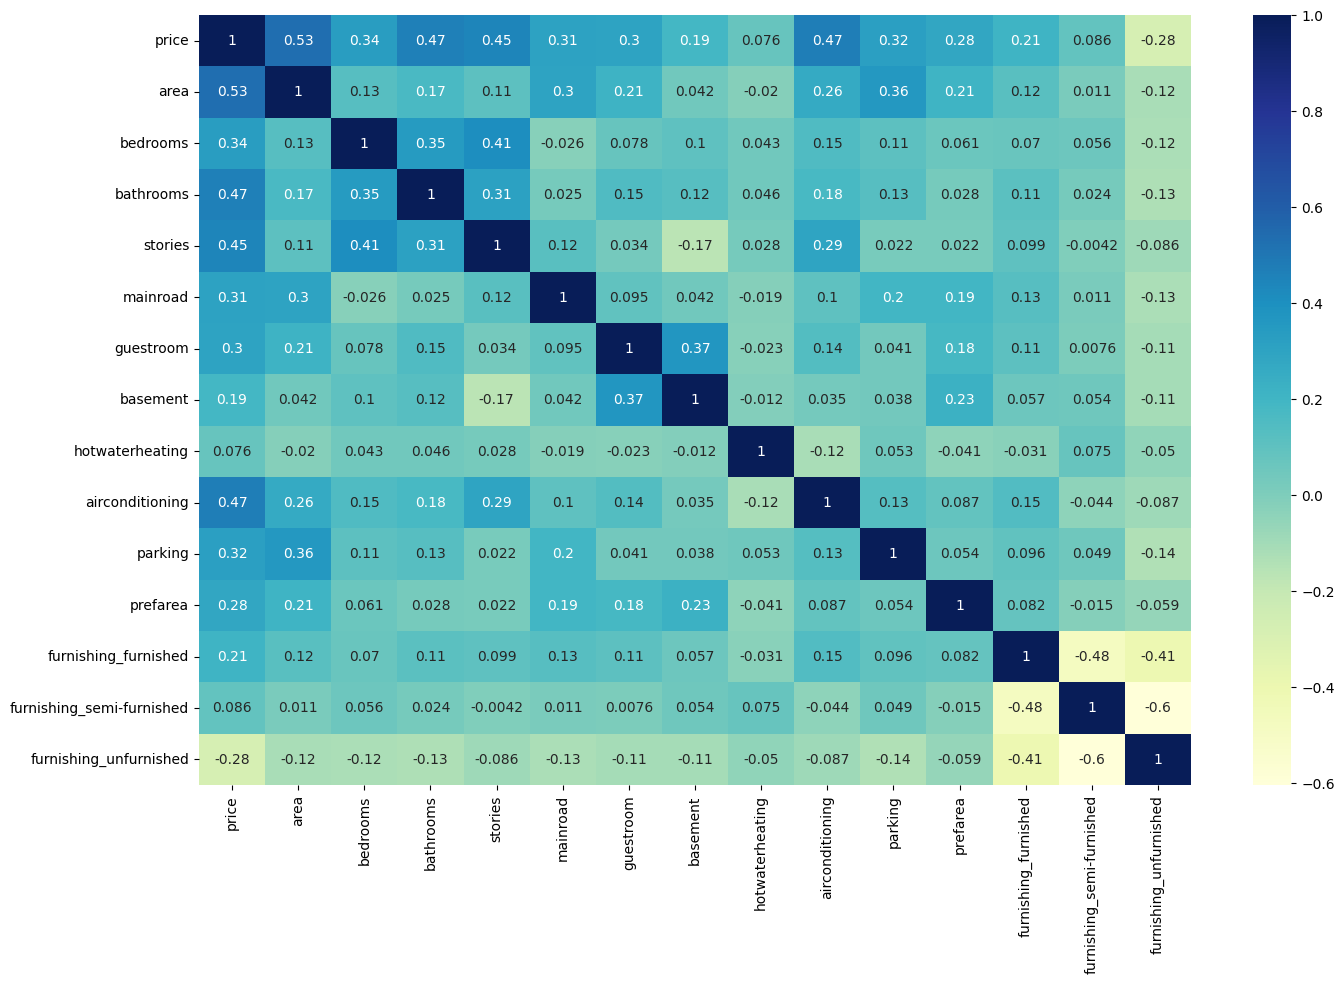

In [31]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='area', ylabel='price'>

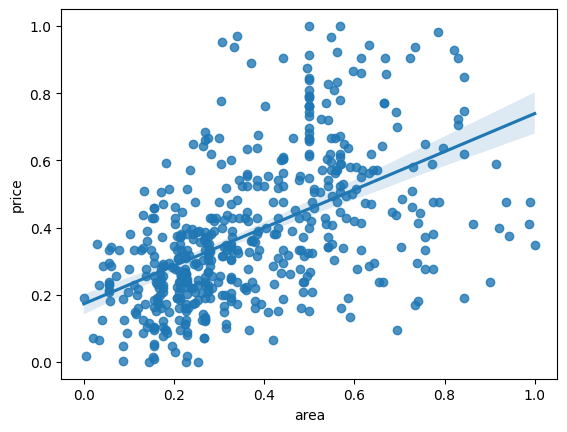

In [32]:
sns.regplot(x=data["area"], y=data["price"],data=data)

In [33]:
x,y = data.drop("price",axis=1),data["price"]

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 14)
(156, 14)
(361,)
(156,)


In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

In [37]:
y_pred1

array([0.46875   , 0.359375  , 0.56640625, 0.5390625 , 0.26171875,
       0.7109375 , 0.21484375, 0.3359375 , 0.63671875, 0.640625  ,
       0.1328125 , 0.34765625, 0.18359375, 0.1640625 , 0.140625  ,
       0.44140625, 0.7109375 , 0.3203125 , 0.33984375, 0.1953125 ,
       0.40234375, 0.359375  , 0.34375   , 0.1796875 , 0.109375  ,
       0.2421875 , 0.5078125 , 0.30859375, 0.25      , 0.59765625,
       0.234375  , 0.34765625, 0.66015625, 0.6484375 , 0.37890625,
       0.59765625, 0.5625    , 0.74609375, 0.140625  , 0.26953125,
       0.5078125 , 0.73046875, 0.55859375, 0.45703125, 0.3515625 ,
       0.23828125, 0.2421875 , 0.23828125, 0.20703125, 0.12890625,
       0.58984375, 0.09765625, 0.4296875 , 0.28125   , 0.28515625,
       0.578125  , 0.30078125, 0.5234375 , 0.4296875 , 0.5859375 ,
       0.421875  , 0.0703125 , 0.40625   , 0.37890625, 0.2421875 ,
       0.39453125, 0.38671875, 0.36328125, 0.26953125, 0.390625  ,
       0.3203125 , 0.3046875 , 0.62109375, 0.69921875, 0.24218

In [38]:
print(lr.intercept_)

-24139613774753.51


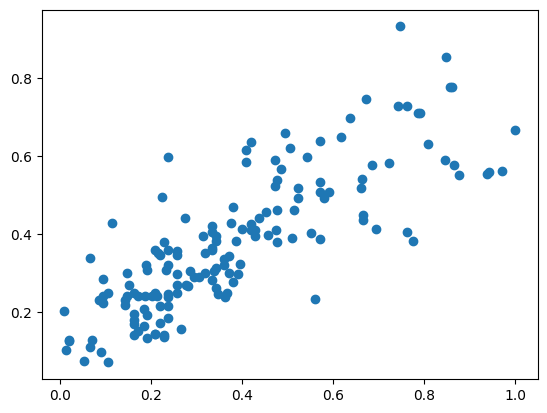

In [39]:
plt.scatter(y_test,y_pred1)

In [40]:
print("MSE : ",mean_squared_error(y_pred1,y_test))
print("MAE : ",mean_absolute_error(y_pred1,y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_pred1,y_test)))
print("R Score :",r2_score(y_pred1,y_test))

MSE :  0.018445932769066562
MAE :  0.09886254960317459
RMSE: 0.13581580456289527
R Score : 0.41347098243244496
